In [1]:
from scipy import stats
import pandas as pd
import seaborn as sns
import pingouin as pg
import numpy as np
from scipy.stats import f #画F分布图
from matplotlib import pyplot as plt


# 例题

**为了比较两种不同气味的阅读材料对学习效果的影响，心理学家随机选取20名被试，随机分成两组，准备了40组单词，一组阅读的材料是有香味的，另一组阅读的材料是没有香味的。以下数据为有香味组和无香味组能回忆起的单词数数据：**

**有香味组**    19, 20, 24, 30, 31, 32, 30, 27, 22, 25

**无香味组**    23, 22, 15, 16, 18, 12, 16, 19, 14, 25


In [2]:
mylist =["有香味"]*10 + ["无香味"]*10

In [3]:
df = pd.DataFrame(
{"group": mylist,
 "study_effects":[19, 20, 24, 30, 31, 32, 30, 27, 22, 25,23, 22, 15, 16, 18, 12, 16, 19, 14, 25]
})

<AxesSubplot:xlabel='group', ylabel='study_effects'>

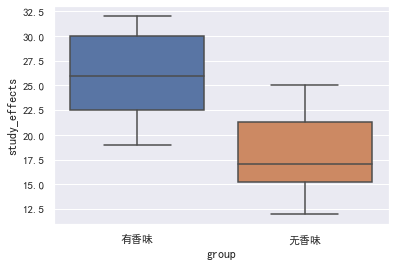

In [4]:
sns.boxplot(x = "group", y = "study_effects",data =df)

In [4]:
df.groupby("group").study_effects.mean()

group
无香味    18.0
有香味    26.0
Name: study_effects, dtype: float64

In [5]:
series_1 = df["study_effects"][df["group"] == "有香味"]
series_2 = df["study_effects"][df["group"] == "无香味"]

## 假设总体方差相等

$$t= \frac{(\bar{X}_{1}- \bar{X}_{2})-(\mu _{1}- \mu _{2})}{\sqrt{S_{p}^{2}(\frac{1}{n_{1}}+ \frac{1}{n_{2}})}}$$
其中，$$S_{p}^{2}= \frac{(n_{1}-1)S_{1}^{2}+(n_{2}-1)S_{2}^{2}}{(n_{1}-1)+(n_{2}-1)}$$

In [6]:
stats.ttest_ind(series_1,series_2,equal_var = True)# equal_var = True 同方差假定

TtestResult(statistic=4.0, pvalue=0.0008398293174085601, df=18.0)

## 假设总体方差不相等

$$t^{\prime}= \frac{(\bar{X}_{1}- \bar{X}_{2})-(\mu _{1}- \mu _{2})}{\sqrt { \frac { s _ { 1 } ^ { 2 } } { n _ { 1 } ^ { 2 } } + \frac { s _ { 2 } ^ { 2 } } { n _ { 2 } } }}$$

In [7]:
stats.ttest_ind(series_1,series_2,equal_var = False)# equal_var = False 异方差假定

TtestResult(statistic=4.0, pvalue=0.0008577202971501111, df=17.78048780487805)

# F检验：检验两样本所来源的总体方差是否相等

检验统计量：$$F = S _ { 1 } ^ { 2 } / S _ { 2 } ^ { 2 }$$

*注意*：样本方差大的作为分子

In [22]:
# F检验
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    if x > y:
        dfn = x.size-1 #分子自由度（ degrees of freedom numerator ）
        dfd = y.size-1 #分母自由度（ degrees of freedom denominator ）
        arrea_1 = 1 - stats.f.cdf(f, dfn, dfd) #计算右侧阴影部分面积 
        arrea_2 = stats.f.cdf(1/f, dfn, dfd)#计算左侧阴影部分面积
    else:
        dfn = y.size-1 #分子自由度（ degrees of freedom numerator ）
        dfd = x.size-1 #分母自由度（ degrees of freedom denominator ）
        arrea_1 = 1 - stats.f.cdf(1/f, dfn, dfd) #计算右侧阴影部分面积 
        arrea_2 = stats.f.cdf(f, dfn, dfd)#计算左侧阴影部分面积
    p = arrea_1 + arrea_2
    return f, p #返回 F值 和 p值

## F分布图

In [23]:
f,p = f_test(df.study_effects[:10],df.study_effects[10:])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [15]:
np.array(df.study_effects[:10])
np.array(df.study_effects[10:])


array([23, 22, 15, 16, 18, 12, 16, 19, 14, 25], dtype=int64)

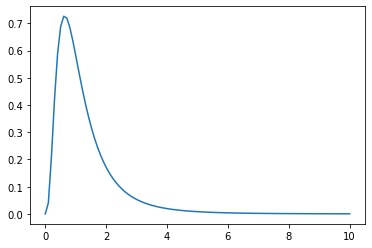

In [8]:
x = np.linspace(0,10,100)
y = stats.f.pdf(x,dfn=9, dfd=9) #分子自由度（dfn）和分母自由度（dfd）分别为9和9
plt.plot(x,y)
# limit = stats.f.ppf(q=0.95, dfn =9, dfd = 9) #临界值
# plt.plot(x, y)
# plt.axvline(x = f ,color = "g") #检验统计量
# plt.fill_between(x,0,y, where= x > limit,color = "red") #拒绝域

**结论**：检验统计量F = 1.25, p = 0.37 > 0.05，因此不能拒绝“两总体方差相等”的假设，即可以认为两总体方差相等，之后做独立样本t检验时使用等方差的独立样本t检验

# 作业题

**从1-100这100个数中随机抽取出10个数字出来作为组一的样本；从30-70这41个数中随机抽取出10个数字出来作为组二的样本。
用独立样本t检验的方法检验这两个样本所来源的总体的均值是否相等（α=0.05）**

In [2]:
a_list = list(range(1, 101))
b_list = list(range(30,71))

In [3]:
a_sample = np.random.choice(a_list, size =10,  replace = True)
b_sample = np.random.choice(b_list, size =10,  replace = True)

In [4]:
a_sample

array([50, 92, 35, 91, 44, 37, 61, 29, 38, 73])

In [5]:
b_sample

array([45, 47, 68, 45, 57, 45, 58, 50, 39, 53])

## 计算两样本的平均值

In [6]:
a_sample.mean()

55.0

In [7]:
b_sample.mean()

50.7

## 计算两个样本的方差


In [9]:
a_sample.var(ddof=1)

540.0

In [8]:
b_sample.var(ddof=1)

71.78888888888889

## 用F检验判断两总体方差是否相等

In [11]:
f_test(a_sample,b_sample)

(7.522055409379353, 0.0030261251677726753)

结论：两总体的方差具有显著差异(F = 7.5, p =0.003 < 0.05)，因此使用独立样本t检验（异方差）

In [12]:
stats.ttest_ind(a_sample, b_sample, equal_var = False)

Ttest_indResult(statistic=0.5497530696149675, pvalue=0.5931402938513513)

结论：两总体均值无显著差异（t = 0.55, p = 0.59 > 0.05）